# Chapter 3: Playing with API & Web Scraping

## Author: Audrey Marthin

### Sources: 
- https://pandas.pydata.org/docs/ 
- Professor Wirfs-Brock's Class Code Demo
- Audrey's projects

Date: Sunday, December 10

### Part 1: Playing with API's
Often times, API gives back data in the [JavaScript Object Notation (JSON)](https://www.json.org/)  format, which is like a list of nested dictionaries :D

In [108]:
# Import the packages we need

import requests # Lets us talk to other servers on the web
import json # APIs returned data format
import pandas as pd
import numpy as np
import collections

Let's explore the [Studio Ghibli API](https://ghibliapi.vercel.app/#section/Getting-Started)!

In [109]:
# Let's first use the Search to find works of art that are in the collection
base_url = "https://ghibliapi.vercel.app/"

# Do a search for all items keyword "dragon"
films = requests.get(base_url + "films").json()
films

[{'id': '2baf70d1-42bb-4437-b551-e5fed5a87abe',
  'title': 'Castle in the Sky',
  'original_title': '天空の城ラピュタ',
  'original_title_romanised': 'Tenkū no shiro Rapyuta',
  'image': 'https://image.tmdb.org/t/p/w600_and_h900_bestv2/npOnzAbLh6VOIu3naU5QaEcTepo.jpg',
  'movie_banner': 'https://image.tmdb.org/t/p/w533_and_h300_bestv2/3cyjYtLWCBE1uvWINHFsFnE8LUK.jpg',
  'description': "The orphan Sheeta inherited a mysterious crystal that links her to the mythical sky-kingdom of Laputa. With the help of resourceful Pazu and a rollicking band of sky pirates, she makes her way to the ruins of the once-great civilization. Sheeta and Pazu must outwit the evil Muska, who plans to use Laputa's science to make himself ruler of the world.",
  'director': 'Hayao Miyazaki',
  'producer': 'Isao Takahata',
  'release_date': '1986',
  'running_time': '124',
  'rt_score': '95',
  'people': ['https://ghibliapi.vercel.app/people/598f7048-74ff-41e0-92ef-87dc1ad980a9',
   'https://ghibliapi.vercel.app/people/fe

In [110]:
# Examine the first item
films[0]

{'id': '2baf70d1-42bb-4437-b551-e5fed5a87abe',
 'title': 'Castle in the Sky',
 'original_title': '天空の城ラピュタ',
 'original_title_romanised': 'Tenkū no shiro Rapyuta',
 'image': 'https://image.tmdb.org/t/p/w600_and_h900_bestv2/npOnzAbLh6VOIu3naU5QaEcTepo.jpg',
 'movie_banner': 'https://image.tmdb.org/t/p/w533_and_h300_bestv2/3cyjYtLWCBE1uvWINHFsFnE8LUK.jpg',
 'description': "The orphan Sheeta inherited a mysterious crystal that links her to the mythical sky-kingdom of Laputa. With the help of resourceful Pazu and a rollicking band of sky pirates, she makes her way to the ruins of the once-great civilization. Sheeta and Pazu must outwit the evil Muska, who plans to use Laputa's science to make himself ruler of the world.",
 'director': 'Hayao Miyazaki',
 'producer': 'Isao Takahata',
 'release_date': '1986',
 'running_time': '124',
 'rt_score': '95',
 'people': ['https://ghibliapi.vercel.app/people/598f7048-74ff-41e0-92ef-87dc1ad980a9',
  'https://ghibliapi.vercel.app/people/fe93adf2-2f3a-4e

In [111]:
# Let's have a function that
def getFilmInfo(film_json):
    info = collections.defaultdict(list)
    for item in film_json:
        film_name = item["title"] + " (" + item["original_title"] + ")"
        info["Film Name"].append(film_name)
        info["Release Date"].append(item["release_date"])
        info["Director"].append(item["director"])
        info["Producer"].append(item["producer"])
        info["Running Time"].append(int(item["running_time"]))
        info["Rt Score"].append(int(item["rt_score"])) # rotten tomatoes score
    return info

# Call function and assign result to variable
film_info_dict = getFilmInfo(films)

# We can also convert the dictionary to a DataFrame
df_films = pd.DataFrame(film_info_dict)

# Sort values based on rt score
df_films.sort_values("Rt Score", ascending=False)

,Film Name,Release Date,Director,Producer,Running Time,Rt Score
4,Only Yesterday (おもひでぽろぽろ),1991,Isao Takahata,Toshio Suzuki,118,100
18,The Tale of the Princess Kaguya (かぐや姫の物語),2013,Isao Takahata,Yoshiaki Nishimura,137,100
10,Spirited Away (千と千尋の神隠し),2001,Hayao Miyazaki,Toshio Suzuki,124,97
1,Grave of the Fireflies (火垂るの墓),1988,Isao Takahata,Toru Hara,89,97
3,Kiki's Delivery Service (魔女の宅急便),1989,Hayao Miyazaki,Hayao Miyazaki,102,96
0,Castle in the Sky (天空の城ラピュタ),1986,Hayao Miyazaki,Isao Takahata,124,95
15,Arrietty (借りぐらしのアリエッティ),2010,Hiromasa Yonebayashi,Toshio Suzuki,94,95
5,Porco Rosso (紅の豚),1992,Hayao Miyazaki,Toshio Suzuki,93,94
2,My Neighbor Totoro (となりのトトロ),1988,Hayao Miyazaki,Hayao Miyazaki,86,93
20,The Red Turtle (レッドタートル ある島の物語),2016,Michaël Dudok de Wit,"Toshio Suzuki, Isao Takahata, Vincent Maraval,...",80,93


In [112]:
# Get movie poster of my favorite Studio Ghibli movie, Spirited Away
def getPoster(film_title, film_json):
    for item in film_json:
        if item["title"] == film_title:
            return item["image"]

poster_spirited_away = getPoster("Spirited Away", films)
poster_spirited_away

'https://image.tmdb.org/t/p/w600_and_h900_bestv2/39wmItIWsg5sZMyRUHLkWBcuVCM.jpg'

And we can embed the URL in this page using Markdown!

![Newfoundland pic](https://image.tmdb.org/t/p/w600_and_h900_bestv2/39wmItIWsg5sZMyRUHLkWBcuVCM.jpg)

In [113]:
# We can also get the species url associated with Spirited Away
def getSpeciesUrl(film_title, film_json):
    for item in film_json:
        if item["title"] == film_title:
            return item["species"]

species_spirited_away_url = getSpeciesUrl("Spirited Away", films)
species_spirited_away_url

['https://ghibliapi.vercel.app/species/af3910a6-429f-4c74-9ad5-dfe1c4aa04f2']

In [114]:
# And now access the json
species_spirited_away = requests.get("https://ghibliapi.vercel.app/species/af3910a6-429f-4c74-9ad5-dfe1c4aa04f2").json()
species_spirited_away

{'id': 'af3910a6-429f-4c74-9ad5-dfe1c4aa04f2',
 'name': 'Human',
 'classification': 'Mammal',
 'eye_colors': 'Black, Blue, Brown, Grey, Green, Hazel',
 'hair_colors': 'Black, Blonde, Brown, Grey, White',
 'people': ['https://ghibliapi.vercel.app/people/ba924631-068e-4436-b6de-f3283fa848f0',
  'https://ghibliapi.vercel.app/people/e9356bb5-4d4a-4c93-aadc-c83e514bffe3',
  'https://ghibliapi.vercel.app/people/34277bec-7401-43fa-a00a-5aee64b45b08',
  'https://ghibliapi.vercel.app/people/91939012-90b9-46e5-a649-96b898073c82',
  'https://ghibliapi.vercel.app/people/20e3bd33-b35d-41e6-83a4-57ca7f028d38',
  'https://ghibliapi.vercel.app/people/8bccdc78-545b-49f4-a4c8-756163a38c91',
  'https://ghibliapi.vercel.app/people/116bfe1b-3ba8-4fa0-8f72-88537a493cb9',
  'https://ghibliapi.vercel.app/people/986faac6-67e3-4fb8-a9ee-bad077c2e7fe',
  'https://ghibliapi.vercel.app/people/d5df3c04-f355-4038-833c-83bd3502b6b9',
  'https://ghibliapi.vercel.app/people/3031caa8-eb1a-41c6-ab93-dd091b541e11',
  'htt

There are many other endpoints of this API we can explore, like more on the species or people endpoint. API's are definitely fun to explore and they are usually pretty straightforward. Some API's need an extra step which is authentication using an API Key. But for now, let's move on to some web scraping!

### Part 2: Having Fun with Web Scraping

In [115]:
# Import more packages
# Requests lets us get info from a web page
import requests

# BeautifulSoup parses and searches the info
from bs4 import BeautifulSoup

First, get the HTML and turn it into "Soup". Let's try this with the "rotten tomatoes editorial" for studio ghibli movies.

In [116]:
# Create a variable called URL
url = "https://editorial.rottentomatoes.com/guide/all-studio-ghibli-movies-ranked-by-tomatometer/"

# Use requests.get to grab the html
html = requests.get(url)

# Examine 
print(html.text)

<!DOCTYPE html>
<html lang="en-US" class="hitim">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
    <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
    
    <!-- OneTrust Cookies Consent Notice start for rottentomatoes.com -->
    <script src="https://cdn.cookielaw.org/consent/7e979733-6841-4fce-9182-515fac69187f/otSDKStub.js"
        type="text/javascript"
        charset="UTF-8"
        data-domain-script="7e979733-6841-4fce-9182-515fac69187f"
        integrity="sha384-TKdmlzVmoD70HzftTw4WtOzIBL5mNx8mXSRzEvwrWjpIJ7FZ/EuX758yMDWXtRUN"
        crossorigin="anonymous" >
    </script>
    <script type="text/javascript">
        function OptanonWrapper() { }
    </script>
    <!-- OneTrust Cookies Consent Notice end for rottentomatoes.com -->
    <!-- OneTrust IAB US Privacy (USP) -->
    <script src="https://cdn.cookielaw.org/opt-out/otCCPAiab.js"
        type="text/javascript"
        charset="UTF-8"
        ccpa-op

In [117]:
# Turn it into soup
# The first argument is our HTML, which we can access with .text
# The second argument is our parser -- we can use lxml, html, etc
ghibli_soup = BeautifulSoup(html.text, "html")

This looks confusing, but it's alright! We can see that the way HTML is structured is there's some containers for contents. Let's try to look for the div tags.

In [129]:
# Use find() to get the first occurence
ghibli_soup.find("div")

<div aria-labelledby="navMenu" class="modal fade" id="navMenu" role="dialog">
<div class="modal-dialog">
<div class="modal-content">
<div class="modal-body">
<button aria-label="Close" class="close" data-dismiss="modal" type="button">
<span class="glyphicon glyphicon-remove"></span>
</button>
<div class="pull-left">
<ul class="list-inline social">
<li><a class="unstyled fontelloIcon icon-facebook-squared" href="https://www.facebook.com/rottentomatoes" id="header-facebook-social-link" target="_blank"></a></li>
<li><a class="unstyled fontelloIcon icon-twitter" href="https://twitter.com/rottentomatoes" id="header-twitter-social-link" target="_blank"></a></li>
</ul>
</div>
<div class="items">
<div class="item">
<a class="homeTab unstyled navLink fullLink" href="https://www.rottentomatoes.com/">
                            Home
                        </a>
</div>
<div class="item">
<a class="boxofficeTab unstyled navLink fullLink" href="https://www.rottentomatoes.com/lists/theater/">
      

In [130]:
# use find_all() to get all occurences returned in a list
all_div = ghibli_soup.find_all("div")

# use len to find how many divs we have
len(all_div)

567

In [148]:
# Add extra parameter class_ to specify which div tag type we are looking for
# Let's try to find the movie rank, title, rt score (rotten tomatoes), 
# Tip: do inspect on the web page you are scraping to help figure out which class_ this is
rank = ghibli_soup.find_all("div", class_="countdown-index-resposive")
title_info = ghibli_soup.find_all("div", class_="article_movie_title")
critics = ghibli_soup.find_all("div", class_="info critics-consensus")

# Examine one
critics

[<div class="info critics-consensus"><span class="descriptor">Critics Consensus:</span> Boasting narrative depth, frank honesty, and exquisite visual beauty, <em>The Tale of the Princess Kaguya</em> is a modern animated treasure with timeless appeal.</div>,
 <div class="info critics-consensus"><span class="descriptor">Critics Consensus:</span> <em>Only Yesterday</em>'s long-delayed U.S. debut fills a frustrating gap for American Ghibli fans while offering further proof of the studio's incredibly consistent commitment to quality.</div>,
 <div class="info critics-consensus"><span class="descriptor">Critics Consensus:</span> <em>Kiki's Delivery Service</em> is a heartwarming, gorgeously-rendered tale of a young witch discovering her place in the world.</div>,
 <div class="info critics-consensus"><span class="descriptor">Critics Consensus:</span> An achingly sad anti-war film, Grave of the Fireflies is one of Studio Ghibli's most profoundly beautiful, haunting works.</div>,
 <div class="in

In [143]:
# Create a getRank function
def getRank(divs):
    rank_list = []
    for rank in divs:
        rank_list.append(rank.text.strip()[1:]) # strip the text and get the 1st index onwards
    return rank_list

# Store result in variable
rank_list = getRank(rank)
rank_list


['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24']

In [154]:
# Create a getFilmInfo function
def getFilmInfo(divs):
    info_dict = collections.defaultdict(list)
    for film in divs:
        # Extract information from the div
        title = film.find("h2").text.strip()[:-5]
        rotten_tomatoes_link = film.find("a")["href"]
        score = film.find("span", class_= "tMeterScore").text
        info_dict["Title"].append(title)
        info_dict["Rotten Tomatoes Score"].append(score)
        info_dict["Rotten Tomatoes Link"].append(rotten_tomatoes_link)
    return info_dict
film_info = getFilmInfo(title_info)
film_info

defaultdict(list,
            {'Title': ['The Tale of the Princess Kaguya (2013) ',
              'Only Yesterday (1991) ',
              "Kiki's Delivery Service (1989)",
              'Grave of the Fireflies (1988) ',
              'Spirited Away (2001)',
              'The Boy and the Heron (2023)',
              'The Secret World of Arrietty (2010)',
              'Princess Mononoke (1997)',
              'My Neighbor Totoro (1988)',
              'When Marnie Was There (2014)',
              'Ponyo (2008)',
              'The Wind Rises (2013)',
              "Howl's Moving Castle (2004)",
              'From Up on Poppy Hill (2011)',
              'Castle in the Sky (1986)',
              'Porco Rosso (1992)',
              'Whisper of the Heart (1995)',
              'Nausicaä of the Valley of the Wind (1984)',
              'Ocean Waves (1993)',
              'The Cat Returns (2002)',
              'Pom Poko (1994)',
              'My Neighbors the Yamadas (1999)',
            

In [151]:
# Create a getCritics function
def getCritics(divs):
    critics_list= []
    for critic in divs:
        # Extracting the consensus from each div
        consensus_text = critic.text.strip()[19:]
        critics_list.append(consensus_text)
    return critics_list
critics_list = getCritics(critics)
critics_list

['Boasting narrative depth, frank honesty, and exquisite visual beauty, The Tale of the Princess Kaguya is a modern animated treasure with timeless appeal.',
 "Only Yesterday's long-delayed U.S. debut fills a frustrating gap for American Ghibli fans while offering further proof of the studio's incredibly consistent commitment to quality.",
 "Kiki's Delivery Service is a heartwarming, gorgeously-rendered tale of a young witch discovering her place in the world.",
 "An achingly sad anti-war film, Grave of the Fireflies is one of Studio Ghibli's most profoundly beautiful, haunting works.",
 'Spirited Away is a dazzling, enchanting, and gorgeously drawn fairy tale that will leave viewers a little more curious and fascinated by the world around them.',
 'Soulfully exploring thought-provoking themes through a beautifully animated lens, The Boy and the Heron is another Miyazaki masterpiece.',
 "Visually lush, refreshingly free of family-friendly clatter, and anchored with soulful depth, The S

In [163]:
# Combine all in a dataframe
df_ghibli_rank = pd.DataFrame(film_info)
df_ghibli_rank["Critics"] = critics_list
df_ghibli_rank["Rank"] = rank_list

# Set the display option to wrap text in columns
pd.set_option('display.max_colwidth', None)

# Reordet columns
column_order = ["Title", "Rank", "Rotten Tomatoes Score", "Rotten Tomatoes Link", "Critics"]
df_ghibli_rank = df_ghibli_rank[column_order]
df_ghibli_rank

,Title,Rank,Rotten Tomatoes Score,Rotten Tomatoes Link,Critics
0,The Tale of the Princess Kaguya (2013),1,100%,https://www.rottentomatoes.com/m/the_tale_of_the_princess_kaguya,"Boasting narrative depth, frank honesty, and exquisite visual beauty, The Tale of the Princess Kaguya is a modern animated treasure with timeless appeal."
1,Only Yesterday (1991),2,100%,https://www.rottentomatoes.com/m/only_yesterday_1991,Only Yesterday's long-delayed U.S. debut fills a frustrating gap for American Ghibli fans while offering further proof of the studio's incredibly consistent commitment to quality.
2,Kiki's Delivery Service (1989),3,98%,https://www.rottentomatoes.com/m/kikis_delivery_service,"Kiki's Delivery Service is a heartwarming, gorgeously-rendered tale of a young witch discovering her place in the world."
3,Grave of the Fireflies (1988),4,100%,https://www.rottentomatoes.com/m/grave_of_the_fireflies,"An achingly sad anti-war film, Grave of the Fireflies is one of Studio Ghibli's most profoundly beautiful, haunting works."
4,Spirited Away (2001),5,96%,https://www.rottentomatoes.com/m/spirited_away,"Spirited Away is a dazzling, enchanting, and gorgeously drawn fairy tale that will leave viewers a little more curious and fascinated by the world around them."
5,The Boy and the Heron (2023),6,96%,https://www.rottentomatoes.com/m/the_boy_and_the_heron,"Soulfully exploring thought-provoking themes through a beautifully animated lens, The Boy and the Heron is another Miyazaki masterpiece."
6,The Secret World of Arrietty (2010),7,94%,https://www.rottentomatoes.com/m/the_secret_world_of_arrietty,"Visually lush, refreshingly free of family-friendly clatter, and anchored with soulful depth, The Secret World of Arrietty lives up to Studio Ghibli's reputation."
7,Princess Mononoke (1997),8,93%,https://www.rottentomatoes.com/m/princess_mononoke,"With its epic story and breathtaking visuals, Princess Mononoke is a landmark in the world of animation."
8,My Neighbor Totoro (1988),9,93%,https://www.rottentomatoes.com/m/my_neighbor_totoro,"My Neighbor Totoro is a heartwarming, sentimental masterpiece that captures the simple grace of childhood."
9,When Marnie Was There (2014),10,92%,https://www.rottentomatoes.com/m/when_marnie_was_there,"When Marnie Was There is still blessed with enough visual and narrative beauty to recommend, even if it isn't quite as magical as Studio Ghibli's greatest works."


Awesome! Let's try another one with the "whats-on-netflix" website specifically the "most popular" part.

<!DOCTYPE html>
<html class="no-js" lang="en">
<head><meta http-equiv="Content-Type" content="text/html; charset=utf-8"><script>if(navigator.userAgent.match(/MSIE|Internet Explorer/i)||navigator.userAgent.match(/Trident\/7\..*?rv:11/i)){var href=document.location.href;if(!href.match(/[?&]nowprocket/)){if(href.indexOf("?")==-1){if(href.indexOf("#")==-1){document.location.href=href+"?nowprocket=1"}else{document.location.href=href.replace("#","?nowprocket=1#")}}else{if(href.indexOf("#")==-1){document.location.href=href+"&nowprocket=1"}else{document.location.href=href.replace("#","&nowprocket=1#")}}}}</script><script>class RocketLazyLoadScripts{constructor(){this.v="1.2.4",this.triggerEvents=["keydown","mousedown","mousemove","touchmove","touchstart","touchend","wheel"],this.userEventHandler=this._triggerListener.bind(this),this.touchStartHandler=this._onTouchStart.bind(this),this.touchMoveHandler=this._onTouchMove.bind(this),this.touchEndHandler=this._onTouchEnd.bind(this),this.clickHandl
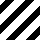

In [164]:
# Create a variable called URL
url = "https://www.whats-on-netflix.com/most-popular/"

# Use requests.get to grab the html
html = requests.get(url)

# Examine 
print(html.text)


In [173]:
# Turn it into soup
netflix_soup = BeautifulSoup(html.text, "html")

# Extracting the movie lists for each country
countries = ["United States", "United Kingdom", "Australia", "Brazil", "Canada", "France", "Germany", "India", "Mexico", "Netherlands", "New Zealand", "Spain"]

# Create a printCountryMovies to print results in a formatted way this time
def printCountryMovies(soup_item):
    print("Top 10 Movies & TV Series on Netflix in Countries:")
    for country in countries:
        print("\n{}".format(country))
        
        # Find the table corresponding to the country
        table = soup_item.find("h4", string=f"{country} Top 10 Movies & TV Series on Netflix for December 11th, 2023").find_next("table")
        
        # Extract movie data from the table rows
        for rank, row in enumerate(table.find_all("tr")[1:], 1):
            columns = row.find_all("td")
            tv_show = columns[1].text.strip()
            movie = columns[2].text.strip()
            print("{}. TV Show: '{}', Movie: '{}'".format(rank, tv_show, movie))
printCountryMovies(netflix_soup)


Top 10 Movies & TV Series on Netflix in Countries:

United States
1. TV Show: 'My Life with the Walter Boys', Movie: 'Leave the World Behind'
2. TV Show: 'World War II: From the Frontlines', Movie: 'The Super Mario Bros. Movie'
3. TV Show: 'The Great British Baking Show: Holidays', Movie: 'Love and Monsters'
4. TV Show: 'Obliterated', Movie: 'Family Switch'
5. TV Show: 'Squid Game: The Challenge', Movie: 'Leo'
6. TV Show: 'Bad Surgeon: Love Under the Knife', Movie: 'The Adventures of Sharkboy and Lavagirl'
7. TV Show: 'Young Sheldon', Movie: 'Suicide Squad'
8. TV Show: 'School Spirits', Movie: 'DC League of Super-Pets'
9. TV Show: 'Stavros Halkias: Fat Rascal', Movie: 'Lucy'
10. TV Show: 'Pax Massilia', Movie: 'Black Adam'

United Kingdom
1. TV Show: 'My Life with the Walter Boys', Movie: 'Leave the World Behind'
2. TV Show: 'Squid Game: The Challenge', Movie: 'The Grinch'
3. TV Show: 'World War II: From the Frontlines', Movie: 'Family Switch'
4. TV Show: 'Obliterated', Movie: 'Sing 2'

#### Now, we're equipped to basic using of API's and scraping websites! 